# Data Analysis of Metal Prices

In [1]:
#importing Libraries

In [2]:
!pip install kaggle

## Data Import:
We have imported data from Kaggle Dataset: https://www.kaggle.com/code/bong0506/metals-prices-within-last-30-years/data
With the help of Kaggle API we imported data into our system in a zipfile

In [3]:
import kaggle


In [4]:
from kaggle.api.kaggle_api_extended import KaggleApi

In [5]:
api = KaggleApi()
api.authenticate()

In [7]:
api.dataset_download_file('timmofeyy/-metals-price-changes-within-last-30-years', 'alum_gold_nickel_silver_uran_price_changes.csv')

True

In [8]:
import zipfile


In [9]:
#As Kaggle API provided us data in zipfile, we need to extract data in from it
with zipfile.ZipFile('alum_gold_nickel_silver_uran_price_changes.csv.zip', 'r') as zipref:
   metal_dataset =  zipref.extractall()

## Data Loading into First Database: MySQL and Data Pre-Processing

In [10]:
!pip install mysql

In [11]:
#Python Library for creating connection between python and MySQL
import mysql.connector as sql

In [12]:
#Connection details for MySQL were saved in gold_db to make a bridge between Python and MySQL

gold_db = sql.connect(
    host = "127.0.0.1",
    user = "root",
    passwd = "Apricot@515",
    auth_plugin = "mysql_native_password")

In [14]:
#cursor() function will create an object which helps to execute the query and fetch the records from the database
#we created a database named 'metal_data' to start our ETL process

mycursor = gold_db.cursor()
mycursor.execute("CREATE DATABASE metal_data")


mycursor.execute("SHOW DATABASES")
for db in mycursor:
    print(db)


('dreamhome',)
('information_schema',)
('metal_data',)
('mysql',)
('performance_schema',)
('prac1',)
('sys',)


In [15]:
#importing below libraries to perform Data Cleaning and visualisation

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#Data extracted from Kaggle site in taken into a Python Dataframe "metal_data" 

metal_data = pd.read_csv('alum_gold_nickel_silver_uran_price_changes.csv')
metal_data

,ID,Date,Price_alum,Price_gold,Price_nickel,Price_silver,Price_uran,Inflation_rate,Price_alum_infl,Price_gold_infl,Price_nickel_infl,Price_silver_infl,Price_uran_infl
0,1,01 February 1992,1266.830000,353.91,7861.900000,4.150000,7.900000,89.50,2401.782997,670.977969,14905.37621,7.867985,14.977610
1,2,02 February 1992,1267.300345,353.58,7846.582759,4.148621,7.894828,89.50,2402.674724,670.352322,14876.33625,7.865370,14.967804
2,3,03 February 1992,1267.770690,353.25,7831.265517,4.147241,7.889655,89.50,2403.566451,669.726675,14847.29629,7.862755,14.957997
3,4,04 February 1992,1268.241034,352.92,7815.948276,4.145862,7.884483,89.50,2404.458177,669.101028,14818.25634,7.860140,14.948191
4,5,05 February 1992,1268.711379,352.59,7800.631034,4.144483,7.879310,89.50,2405.349904,668.475381,14789.21638,7.857525,14.938384
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10922,10923,27 December 2021,2695.530000,1790.43,20015.550000,22.530000,NaN,-1.29,2660.757663,1767.333453,19757.34941,22.239363,NaN
10923,10924,28 December 2021,2695.530000,1790.43,20015.550000,22.530000,NaN,-1.29,2660.757663,1767.333453,19757.34941,22.239363,NaN
10924,10925,29 December 2021,2695.530000,1790.43,20015.550000,22.530000,NaN,-1.29,2660.757663,1767.333453,19757.34941,22.239363,NaN
10925,10926,30 December 2021,2695.530000,1790.43,20015.550000,22.530000,NaN,-1.29,2660.757663,1767.333453,19757.34941,22.239363,NaN


In [17]:
metal_data.describe()

,ID,Price_alum,Price_gold,Price_nickel,Price_silver,Price_uran,Inflation_rate,Price_alum_infl,Price_gold_infl,Price_nickel_infl,Price_silver_infl,Price_uran_infl
count,10927.00000,10927.000000,10927.000000,10903.000000,10889.000000,10896.000000,10927.000000,10915.000000,10927.000000,10883.000000,10917.000000,10896.000000
mean,5464.00000,1802.414326,837.597557,13173.418234,12.823803,28.388064,35.102767,2359.047785,1013.651411,16618.751339,15.597359,35.159717
std,3154.49753,437.125199,525.610721,7644.513255,8.670460,21.321675,27.353413,446.626540,504.601086,8536.676980,8.990675,25.042060
min,1.00000,1039.810000,256.080000,3871.930000,3.650000,1.036667,-1.290000,1500.662047,391.345152,6318.989760,6.189888,1.023294
25%,2732.50000,1473.478548,354.082586,7335.423736,5.097742,10.472661,12.240000,2035.584587,567.573369,11304.906500,8.310571,17.814505
50%,5464.00000,1741.250000,656.084193,11809.457740,12.222903,24.250323,24.000000,2301.893288,830.637791,14149.211730,13.140000,26.886872
75%,8195.50000,2034.115806,1284.841834,16721.225835,17.479677,39.321071,59.700000,2575.324050,1408.193863,19493.570045,19.645273,43.630030
max,10927.00000,3071.240000,1968.630000,52179.050000,42.700000,136.220000,89.500000,3794.824144,2095.909978,66945.721150,50.501290,174.770260


<AxesSubplot:>

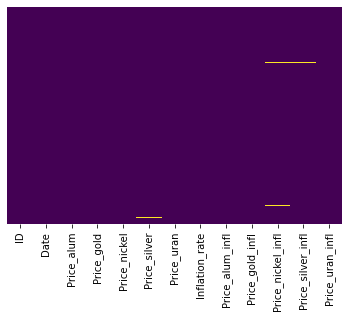

In [18]:
#With help of Seaborm library we plotted a visualisation of Nulls in the dataset

sns.heatmap(metal_data.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [19]:
#interpolate() function in pandas dataframe fills the NUll values statistically
metal_data.interpolate(inplace = True)

<AxesSubplot:>

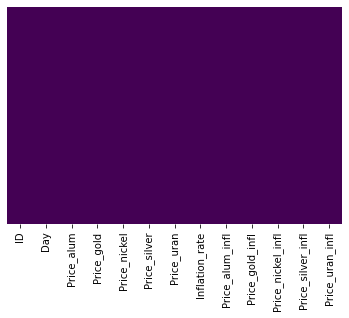

In [17]:
sns.heatmap(metal_data.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [20]:
metal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10927 entries, 0 to 10926
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 10927 non-null  int64  
 1   Date               10927 non-null  object 
 2   Price_alum         10927 non-null  float64
 3   Price_gold         10927 non-null  float64
 4   Price_nickel       10927 non-null  float64
 5   Price_silver       10927 non-null  float64
 6   Price_uran         10927 non-null  float64
 7   Inflation_rate     10927 non-null  float64
 8   Price_alum_infl    10927 non-null  float64
 9   Price_gold_infl    10927 non-null  float64
 10  Price_nickel_infl  10927 non-null  float64
 11  Price_silver_infl  10927 non-null  float64
 12  Price_uran_infl    10927 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.1+ MB


In [21]:
#changing the datatpye of Date column to datetime
metal_data['Date']= pd.to_datetime(metal_data['Date'])


In [28]:
metal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10927 entries, 0 to 10926
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 10927 non-null  int64         
 1   Date               10927 non-null  datetime64[ns]
 2   Price_alum         10927 non-null  float64       
 3   Price_gold         10927 non-null  float64       
 4   Price_nickel       10927 non-null  float64       
 5   Price_silver       10927 non-null  float64       
 6   Price_uran         10927 non-null  float64       
 7   Inflation_rate     10927 non-null  float64       
 8   Price_alum_infl    10927 non-null  float64       
 9   Price_gold_infl    10927 non-null  float64       
 10  Price_nickel_infl  10927 non-null  float64       
 11  Price_silver_infl  10927 non-null  float64       
 12  Price_uran_infl    10927 non-null  float64       
dtypes: datetime64[ns](1), float64(11), int64(1)
memory usage: 1.1

In [22]:
metal_data.head()

,ID,Date,Price_alum,Price_gold,Price_nickel,Price_silver,Price_uran,Inflation_rate,Price_alum_infl,Price_gold_infl,Price_nickel_infl,Price_silver_infl,Price_uran_infl
0,1,1992-02-01,1266.830000,353.91,7861.900000,4.150000,7.900000,89.5,2401.782997,670.977969,14905.37621,7.867985,14.977610
1,2,1992-02-02,1267.300345,353.58,7846.582759,4.148621,7.894828,89.5,2402.674724,670.352322,14876.33625,7.865370,14.967804
2,3,1992-02-03,1267.770690,353.25,7831.265517,4.147241,7.889655,89.5,2403.566451,669.726675,14847.29629,7.862755,14.957997
3,4,1992-02-04,1268.241034,352.92,7815.948276,4.145862,7.884483,89.5,2404.458177,669.101028,14818.25634,7.860140,14.948191
4,5,1992-02-05,1268.711379,352.59,7800.631034,4.144483,7.879310,89.5,2405.349904,668.475381,14789.21638,7.857525,14.938384


In [23]:
#Creating a connection between Python and MySQL mentioning the database "metal_data"
import mysql.connector as sql 

gold_db = sql.connect(
    host = "127.0.0.1",
    user = "root",
    passwd = "Apricot@515",
    auth_plugin = "mysql_native_password",
    database = "metal_data",
    charset = "utf8")

mycursor = gold_db.cursor()

In [24]:
#Below is the SQL query to create a table "metals" in database "metal_data" with help of cursor object

create_metal_table_query = """
CREATE TABLE metals(
    id INT  PRIMARY KEY,
    Day Date,
    Price_alum FLOAT(15,9),
    Price_gold FLOAT(15,9),
    Price_nickel FLOAT(20,10),
    Price_silver FLOAT(15,9),
    Price_uran FLOAT(15,9),
    Inflation_rate FLOAT(15,9),
    Price_alum_infl FLOAT(15,9),
    Price_gold_infl FLOAT(15,9),
    Price_nickel_infl FLOAT(15,9),
    Price_silver_infl FLOAT(15,9),
    Price_uran_infl FLOAT(15,9)
)
"""
mycursor.execute(create_metal_table_query)
gold_db.commit()


for (row,rs) in metal_data.iterrows():
    id = str(int(rs[0]))
    date = str(rs[1])
    price_alum = str(float(rs[2]))
    price_gold = str(float(rs[3]))
    price_nickel = str(float(rs[4]))
    price_silver = str(float(rs[5]))
    price_uran = str(float(rs[6]))
    inflation_rate = str(float(rs[7]))
    price_alum_infl = str(float(rs[8]))
    price_gold_infl = str(float(rs[9]))
    price_nickel_infl = str(float(rs[10]))
    price_silver_infl = str(float(rs[11]))
    price_uran_infl = str(float(rs[12]))
    
    #print(id, date, price_alum, price_nickel,price_silver, price_uran, inflation_rate, price_alum_infl, price_gold_infl, price_nickel_infl, price_silver_infl, price_uran_infl)
    query = "insert into metals values("+id+","+"'"+date+"'"+","+"'"+price_alum+"'"+","+"'"+price_gold+"'"+","+"'"+price_nickel+"'"+","+"'"+price_silver+"'"+","+"'"+price_uran+"'"+","+"'"+inflation_rate+"'"+","+"'"+price_alum_infl+"'"+","+"'"+price_gold_infl+"'"+","+"'"+price_nickel_infl+"'"+","+"'"+price_silver_infl+"'"+","+price_uran_infl+")"
    mycursor.execute(query)
    
gold_db.commit()

    

In [25]:
#Data is successfully inserted into metals table in database "metal_data"
mycursor.execute("Select * from metals LIMIT 10")
my_result = mycursor.fetchall()

print(my_result)

[(1, datetime.date(1992, 2, 1), 1266.829956055, 353.910003662, 7861.8999023438, 4.150000095, 7.900000095, 89.5, 2401.782958984, 670.977966309, 14905.375976562, 7.867984772, 14.977609634), (2, datetime.date(1992, 2, 2), 1267.300292969, 353.579986572, 7846.5825195312, 4.148620605, 7.894827366, 89.5, 2402.674804688, 670.352294922, 14876.3359375, 7.865369797, 14.967803955), (3, datetime.date(1992, 2, 3), 1267.770629883, 353.25, 7831.265625, 4.147241592, 7.889655113, 89.5, 2403.56640625, 669.72668457, 14847.295898438, 7.862754822, 14.957997322), (4, datetime.date(1992, 2, 4), 1268.241088867, 352.920013428, 7815.9482421875, 4.145862103, 7.884482861, 89.5, 2404.458251953, 669.101013184, 14818.255859375, 7.860139847, 14.948190689), (5, datetime.date(1992, 2, 5), 1268.711425781, 352.589996338, 7800.630859375, 4.144482613, 7.879310131, 89.5, 2405.349853516, 668.475402832, 14789.216796875, 7.857524872, 14.938384056), (6, datetime.date(1992, 2, 6), 1269.181762695, 352.260009766, 7785.3139648438, 4

In [26]:
#changing the column name Day to Date
change_name_query = """
ALTER TABLE metals RENAME COLUMN Day TO Date
"""
mycursor.execute(change_name_query)
gold_db.commit()


In [27]:
#Created a seperate final table in which transformed data is saved
create_final_table = """CREATE TABLE finalmetals(
    ID int,
    Date Date,
    Month nvarchar(10),
    Year int,
    Price_alum FLOAT(15,9),
    Price_gold FLOAT(15,9),
    Price_nickel FLOAT(20,10),
    Price_silver FLOAT(15,9),
    Price_uran FLOAT(15,9),
    Inflation_rate FLOAT(15,9),
    Price_alum_infl FLOAT(15,9),
    Price_gold_infl FLOAT(15,9),
    Price_nickel_infl FLOAT(15,9),
    Price_silver_infl FLOAT(15,9),
    Price_uran_infl FLOAT(15,9)
)
"""
mycursor.execute(create_final_table)
gold_db.commit()

In [28]:
#insert query for putting all transformed data in table "finalmtals" with filtered Date from 2010 t0 2020
final_query = """
INSERT into finalmetals
select  ID, Date,monthname(Date), year(Date), Price_alum, Price_gold, Price_nickel, Price_silver, Price_uran, Inflation_rate, Price_alum_infl, Price_gold_infl, Price_nickel_infl, Price_silver_infl, Price_uran_infl from metals where Date between '2010-01-01' and '2020-12-31' order by Date

"""

mycursor.execute(final_query)
gold_db.commit()

In [29]:
mycursor.execute("Select * from finalmetals LIMIT 10")
my_result = mycursor.fetchall()

print(my_result)

[(6545, datetime.date(2010, 1, 1), 'January', 2010, 2235.149902344, 1117.959960938, 18439.25, 17.75, 43.830001831, 22.0, 2726.883056641, 1363.911254883, 22495.884765625, 21.655000687, 53.47259903), (6546, datetime.date(2010, 1, 2), 'January', 2010, 2229.142822266, 1117.232543945, 18456.564453125, 17.689353943, 43.77419281, 22.0, 2719.554443359, 1363.023803711, 22517.0078125, 21.581012726, 53.404514313), (6547, datetime.date(2010, 1, 3), 'January', 2010, 2223.135742188, 1116.505126953, 18473.87890625, 17.628709793, 43.718387604, 22.0, 2712.225585938, 1362.136352539, 22538.1328125, 21.507026672, 53.336433411), (6548, datetime.date(2010, 1, 4), 'January', 2010, 2217.128662109, 1115.777709961, 18491.193359375, 17.568063736, 43.662582397, 22.0, 2704.896972656, 1361.248901367, 22559.255859375, 21.433038712, 53.268348694), (6549, datetime.date(2010, 1, 5), 'January', 2010, 2211.121582031, 1115.050292969, 18508.5078125, 17.507419586, 43.606773376, 22.0, 2697.568359375, 1360.361450195, 22580.37

In [34]:
#Retrieving data from MySQL back into Python dataframe df 

df = pd.read_sql("select * from finalmetals", gold_db)
df

df['Date']= pd.to_datetime(df['Date'])

In [38]:
#Creating a list of dictionaries from python Dataframe

data_for_MongoDB = df.to_dict('records')
data_for_MongoDB

[{'ID': 6545,
  'Date': Timestamp('2010-01-01 00:00:00'),
  'Month': 'January',
  'Year': 2010,
  'Price_alum': 2235.149902344,
  'Price_gold': 1117.959960938,
  'Price_nickel': 18439.25,
  'Price_silver': 17.75,
  'Price_uran': 43.830001831,
  'Inflation_rate': 22.0,
  'Price_alum_infl': 2726.883056641,
  'Price_gold_infl': 1363.911254883,
  'Price_nickel_infl': 22495.884765625,
  'Price_silver_infl': 21.655000687,
  'Price_uran_infl': 53.47259903},
 {'ID': 6546,
  'Date': Timestamp('2010-01-02 00:00:00'),
  'Month': 'January',
  'Year': 2010,
  'Price_alum': 2229.142822266,
  'Price_gold': 1117.232543945,
  'Price_nickel': 18456.564453125,
  'Price_silver': 17.689353943,
  'Price_uran': 43.77419281,
  'Inflation_rate': 22.0,
  'Price_alum_infl': 2719.554443359,
  'Price_gold_infl': 1363.023803711,
  'Price_nickel_infl': 22517.0078125,
  'Price_silver_infl': 21.581012726,
  'Price_uran_infl': 53.404514313},
 {'ID': 6547,
  'Date': Timestamp('2010-01-03 00:00:00'),
  'Month': 'January'

In [35]:
!pip install pymongo

## Data Loading into Second Database: MongoDB

In [36]:
#Python library for using MongoDB through Python
import pymongo

clientName = pymongo.MongoClient('mongodb://127.0.0.1:27017/')

In [39]:
#Creating bridge between Python and MongoDB
mongo_golddb = clientName['Metal_Data']

info = mongo_golddb.metals

info.insert_many(data_for_MongoDB)

In [43]:
metal_collection = mongo_golddb["metals"]


final_list = pd.DataFrame(list(metal_collection.find()))
final_list.head()



,_id,ID,Date,Month,Year,Price_alum,Price_gold,Price_nickel,Price_silver,Price_uran,Inflation_rate,Price_alum_infl,Price_gold_infl,Price_nickel_infl,Price_silver_infl,Price_uran_infl
0,6267eb85c1d01ff71ad0d488,6545,2010-01-01,January,2010,2235.149902,1117.959961,18439.250000,17.750000,43.830002,22.0,2726.883057,1363.911255,22495.884766,21.655001,53.472599
1,6267eb85c1d01ff71ad0d489,6546,2010-01-02,January,2010,2229.142822,1117.232544,18456.564453,17.689354,43.774193,22.0,2719.554443,1363.023804,22517.007812,21.581013,53.404514
2,6267eb85c1d01ff71ad0d48a,6547,2010-01-03,January,2010,2223.135742,1116.505127,18473.878906,17.628710,43.718388,22.0,2712.225586,1362.136353,22538.132812,21.507027,53.336433
3,6267eb85c1d01ff71ad0d48b,6548,2010-01-04,January,2010,2217.128662,1115.777710,18491.193359,17.568064,43.662582,22.0,2704.896973,1361.248901,22559.255859,21.433039,53.268349
4,6267eb85c1d01ff71ad0d48c,6549,2010-01-05,January,2010,2211.121582,1115.050293,18508.507812,17.507420,43.606773,22.0,2697.568359,1360.361450,22580.378906,21.359051,53.200264


In [44]:
del final_list['_id']
final_list.head()
del final_list['ID']
final_list.head()

,Date,Month,Year,Price_alum,Price_gold,Price_nickel,Price_silver,Price_uran,Inflation_rate,Price_alum_infl,Price_gold_infl,Price_nickel_infl,Price_silver_infl,Price_uran_infl
0,2010-01-01,January,2010,2235.149902,1117.959961,18439.250000,17.750000,43.830002,22.0,2726.883057,1363.911255,22495.884766,21.655001,53.472599
1,2010-01-02,January,2010,2229.142822,1117.232544,18456.564453,17.689354,43.774193,22.0,2719.554443,1363.023804,22517.007812,21.581013,53.404514
2,2010-01-03,January,2010,2223.135742,1116.505127,18473.878906,17.628710,43.718388,22.0,2712.225586,1362.136353,22538.132812,21.507027,53.336433
3,2010-01-04,January,2010,2217.128662,1115.777710,18491.193359,17.568064,43.662582,22.0,2704.896973,1361.248901,22559.255859,21.433039,53.268349
4,2010-01-05,January,2010,2211.121582,1115.050293,18508.507812,17.507420,43.606773,22.0,2697.568359,1360.361450,22580.378906,21.359051,53.200264


In [45]:
qw = final_list.groupby(by = ['Year'], sort=False).mean()
qw

,Price_alum,Price_gold,Price_nickel,Price_silver,Price_uran,Inflation_rate,Price_alum_infl,Price_gold_infl,Price_nickel_infl,Price_silver_infl,Price_uran_infl
Year,,,,,,,,,,,
2010,2181.778342,1235.130739,22105.846656,20.608219,46.807274,22.00,2658.030080,1504.774078,26929.820291,25.098325,57.006954
2011,2388.557906,1582.183042,22649.592915,35.320479,55.718466,18.27,2822.832606,1869.616491,26768.090759,41.743301,65.846636
2012,2018.370767,1670.060654,17445.178879,31.143033,48.505751,15.87,2337.283164,1933.948172,20201.698482,36.064047,56.174180
2013,1833.398166,1393.076754,14883.692653,23.366452,38.241712,14.19,2092.265354,1589.823697,16985.141663,26.667282,43.641876
2014,1871.955563,1265.568781,16933.325300,18.957479,33.507274,12.37,2103.419520,1422.052820,19027.184303,21.301599,37.650206
2015,1650.297616,1154.215922,11591.463458,15.588863,36.753247,12.24,1851.544470,1294.860271,13005.363985,17.488822,41.231885
2016,1616.971708,1252.839620,9657.682737,17.267691,25.968729,10.84,1790.555629,1387.518848,10695.135385,19.123509,28.762751
2017,1985.170350,1263.360562,10528.521854,17.070986,22.120918,8.53,2152.153385,1369.708204,11412.911580,18.508909,23.982957
2018,2093.811754,1267.273497,13056.905102,15.647781,24.780247,5.94,2216.751979,1341.551529,13823.582518,16.565191,26.230012


## Data Visualization

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
#Creating seperate dataframe for Visualisation

df_inf = final_list[['Year','Month','Price_alum_infl','Price_gold_infl','Price_nickel_infl','Price_silver_infl','Price_uran_infl']]
df_real =  final_list[['Year','Month','Price_alum','Price_gold','Price_nickel','Price_silver','Price_uran']]
inf_rate = final_list[['Year','Inflation_rate']].groupby(['Year']).mean()
yymm = final_list[['Year','Month']]

display(df_inf.head())
display(df_real.head())
display(inf_rate.head())

,Year,Month,Price_alum_infl,Price_gold_infl,Price_nickel_infl,Price_silver_infl,Price_uran_infl
0,2010,January,2726.883057,1363.911255,22495.884766,21.655001,53.472599
1,2010,January,2719.554443,1363.023804,22517.007812,21.581013,53.404514
2,2010,January,2712.225586,1362.136353,22538.132812,21.507027,53.336433
3,2010,January,2704.896973,1361.248901,22559.255859,21.433039,53.268349
4,2010,January,2697.568359,1360.361450,22580.378906,21.359051,53.200264


,Year,Month,Price_alum,Price_gold,Price_nickel,Price_silver,Price_uran
0,2010,January,2235.149902,1117.959961,18439.250000,17.750000,43.830002
1,2010,January,2229.142822,1117.232544,18456.564453,17.689354,43.774193
2,2010,January,2223.135742,1116.505127,18473.878906,17.628710,43.718388
3,2010,January,2217.128662,1115.777710,18491.193359,17.568064,43.662582
4,2010,January,2211.121582,1115.050293,18508.507812,17.507420,43.606773


,Inflation_rate
Year,
2010,22.00
2011,18.27
2012,15.87
2013,14.19
2014,12.37


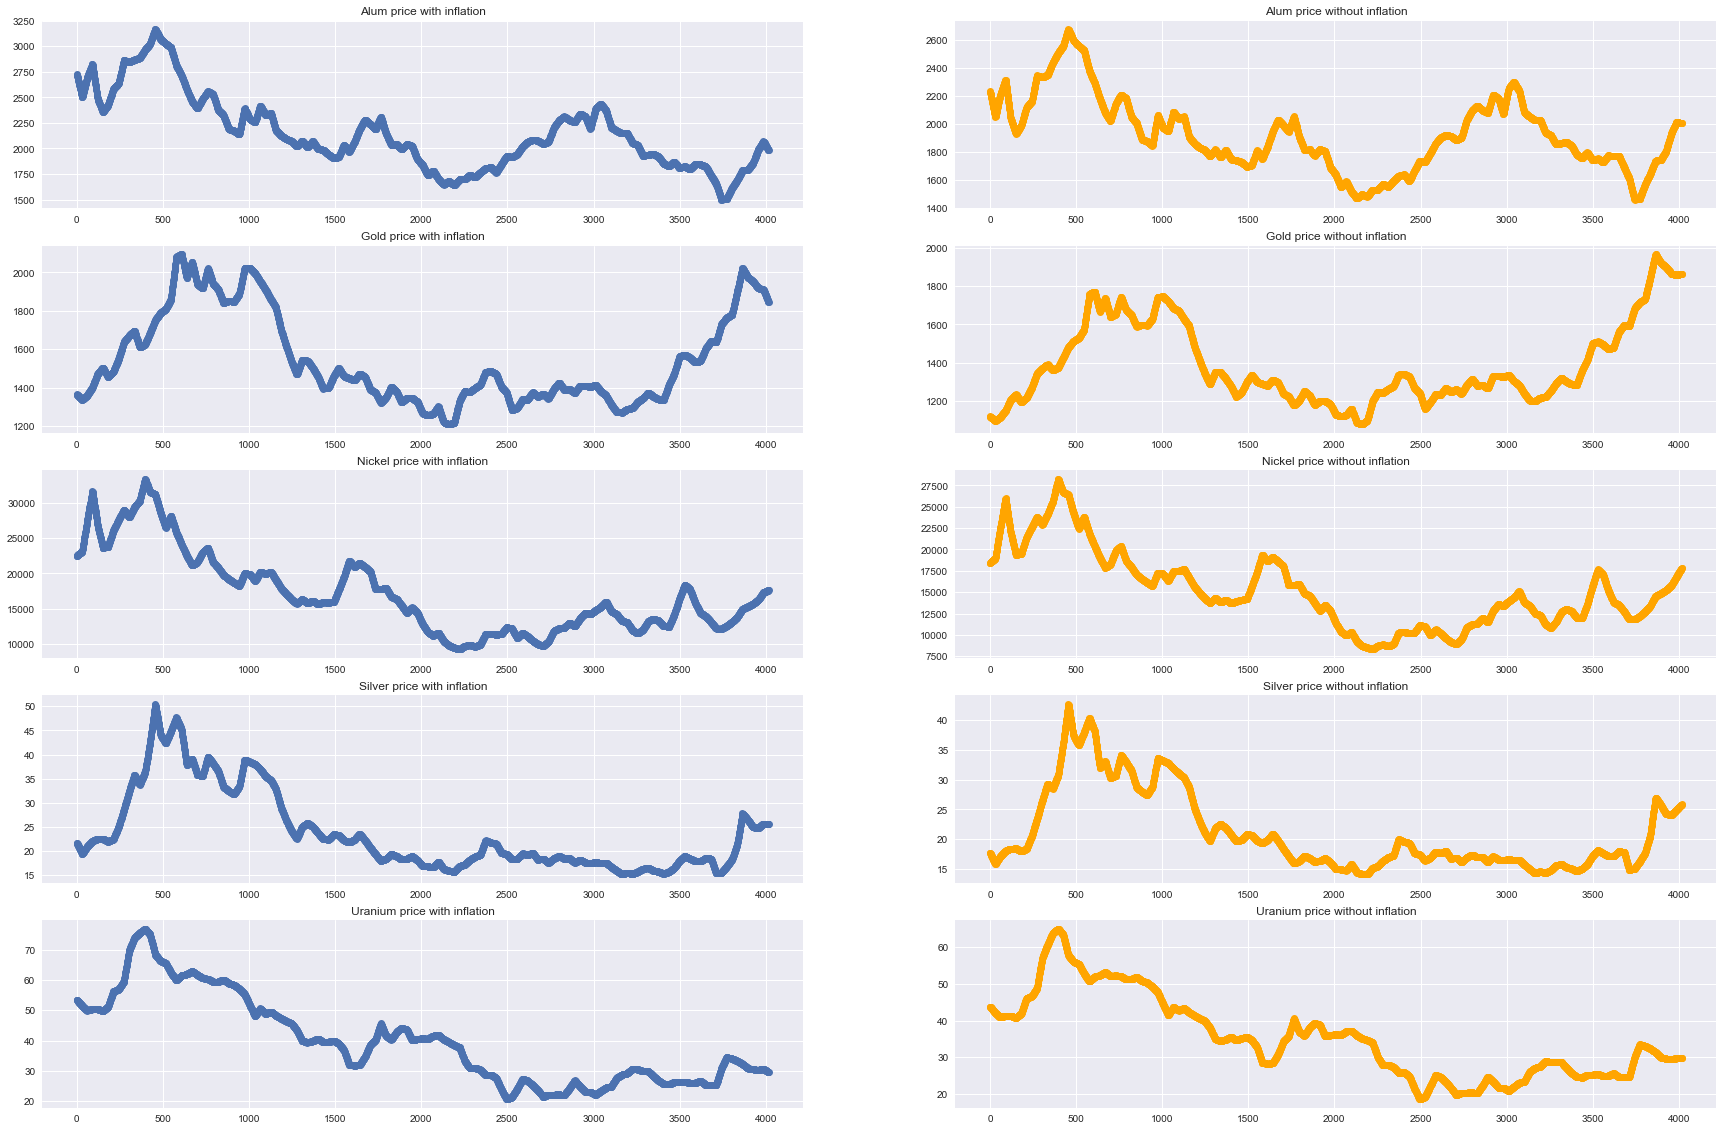

In [56]:
# Visualize metal price changes

f,ax = plt.subplots(5,2,figsize=(30,20))

df_inf['Price_alum_infl'].plot(marker='o',ax=ax[0,0],title='Alum price with inflation')
df_real['Price_alum'].plot(marker='o',color='orange',ax=ax[0,1],title='Alum price without inflation')
df_inf['Price_gold_infl'].plot(marker='o',ax=ax[1,0],title='Gold price with inflation')
df_real['Price_gold'].plot(marker='o',color='orange',ax=ax[1,1],title='Gold price without inflation')
df_inf['Price_nickel_infl'].plot(marker='o',ax=ax[2,0],title='Nickel price with inflation')
df_real['Price_nickel'].plot(marker='o',color='orange',ax=ax[2,1],title='Nickel price without inflation')
df_inf['Price_silver_infl'].plot(marker='o',ax=ax[3,0],title='Silver price with inflation')
df_real['Price_silver'].plot(marker='o',color='orange',ax=ax[3,1],title='Silver price without inflation')
df_inf['Price_uran_infl'].plot(marker='o',ax=ax[4,0],title='Uranium price with inflation')
df_real['Price_uran'].plot(marker='o',color='orange',ax=ax[4,1],title='Uranium price without inflation')
plt.style.use('seaborn')
plt.show()

In [49]:
df_inf1 = final_list[['Year','Price_alum_infl','Price_gold_infl','Price_nickel_infl','Price_silver_infl','Price_uran_infl']]
df_real1 =  final_list[['Year','Price_alum','Price_gold','Price_nickel','Price_silver','Price_uran']]

df_inf1 = df_inf1.groupby(by = ['Year'], sort=False).mean()
df_real1 = df_real1.groupby(by = ['Year'], sort=False).mean()
df_inf1


,Price_alum_infl,Price_gold_infl,Price_nickel_infl,Price_silver_infl,Price_uran_infl
Year,,,,,
2010,2658.030080,1504.774078,26929.820291,25.098325,57.006954
2011,2822.832606,1869.616491,26768.090759,41.743301,65.846636
2012,2337.283164,1933.948172,20201.698482,36.064047,56.174180
2013,2092.265354,1589.823697,16985.141663,26.667282,43.641876
2014,2103.419520,1422.052820,19027.184303,21.301599,37.650206
2015,1851.544470,1294.860271,13005.363985,17.488822,41.231885
2016,1790.555629,1387.518848,10695.135385,19.123509,28.762751
2017,2152.153385,1369.708204,11412.911580,18.508909,23.982957
2018,2216.751979,1341.551529,13823.582518,16.565191,26.230012


In [50]:
df_real1

,Price_alum,Price_gold,Price_nickel,Price_silver,Price_uran
Year,,,,,
2010,2181.778342,1235.130739,22105.846656,20.608219,46.807274
2011,2388.557906,1582.183042,22649.592915,35.320479,55.718466
2012,2018.370767,1670.060654,17445.178879,31.143033,48.505751
2013,1833.398166,1393.076754,14883.692653,23.366452,38.241712
2014,1871.955563,1265.568781,16933.325300,18.957479,33.507274
2015,1650.297616,1154.215922,11591.463458,15.588863,36.753247
2016,1616.971708,1252.839620,9657.682737,17.267691,25.968729
2017,1985.170350,1263.360562,10528.521854,17.070986,22.120918
2018,2093.811754,1267.273497,13056.905102,15.647781,24.780247


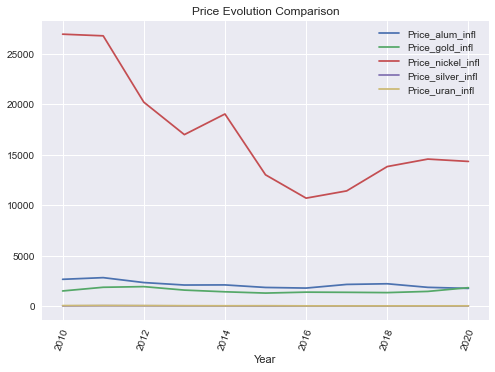

In [57]:
for i, col in enumerate(df_inf1.columns):
    df_inf1[col].plot()

plt.title('Price Evolution Comparison')
plt.style.use('seaborn')
plt.xticks(rotation=70)
plt.legend(df_inf1.columns)



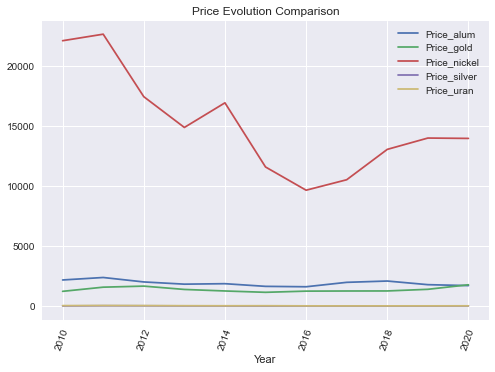

In [58]:
for i, col in enumerate(df_real1.columns):
    df_real1[col].plot()

plt.title('Price Evolution Comparison')
plt.style.use('seaborn')
plt.xticks(rotation=70)
plt.legend(df_real1.columns)

In [59]:
# Change rate in period
df_real3 =  final_list[['Year','Price_alum','Price_gold','Price_nickel','Price_silver','Price_uran']]
df_rate3 = df_real3[['Price_alum','Price_gold','Price_nickel','Price_silver','Price_uran']].pct_change()
df_rate3 = pd.concat([yymm, df_rate3],axis=1)

df_rate3

,Year,Month,Price_alum,Price_gold,Price_nickel,Price_silver,Price_uran
0,2010,January,NaN,NaN,NaN,NaN,NaN
1,2010,January,-0.002688,-0.000651,0.000939,-0.003417,-0.001273
2,2010,January,-0.002695,-0.000651,0.000938,-0.003428,-0.001275
3,2010,January,-0.002702,-0.000652,0.000937,-0.003440,-0.001276
4,2010,January,-0.002709,-0.000652,0.000936,-0.003452,-0.001278
...,...,...,...,...,...,...,...
4013,2020,December,-0.000172,0.000148,0.001900,0.001142,0.000097
4014,2020,December,-0.000172,0.000148,0.001896,0.001141,0.000097
4015,2020,December,-0.000172,0.000148,0.001893,0.001139,0.000097
4016,2020,December,-0.000172,0.000148,0.001889,0.001138,0.000097


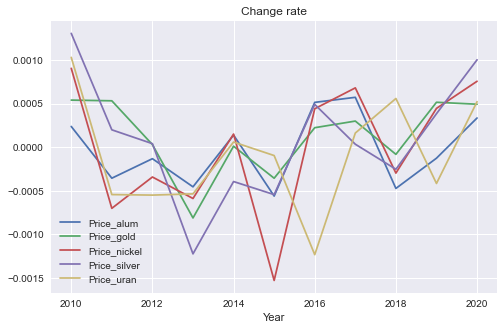

In [60]:
df_rate3.groupby(['Year']).mean().plot(title='Change rate',figsize=(8,5))
plt.style.use('seaborn')

In [61]:
final_list.tail()

,Date,Month,Year,Price_alum,Price_gold,Price_nickel,Price_silver,Price_uran,Inflation_rate,Price_alum_infl,Price_gold_infl,Price_nickel_infl,Price_silver_infl,Price_uran_infl
4013,2020-12-27,December,2020,2005.704224,1865.599365,17695.416016,25.733225,29.845484,2.79,1993.088379,1853.762695,17577.851562,25.565586,29.656384
4014,2020-12-28,December,2020,2005.359375,1865.875488,17728.968750,25.762581,29.848387,2.79,1990.096436,1851.589355,17588.830078,25.561699,29.620068
4015,2020-12-29,December,2020,2005.014526,1866.151611,17762.521484,25.791935,29.851290,2.79,1987.104492,1849.416016,17599.808594,25.557810,29.583752
4016,2020-12-30,December,2020,2004.669678,1866.427734,17796.074219,25.821291,29.854193,2.79,1984.112549,1847.242676,17610.787109,25.553923,29.547438
4017,2020-12-31,December,2020,2004.324829,1866.703857,17829.626953,25.850645,29.857098,2.79,1981.120605,1845.069336,17621.765625,25.550035,29.511122


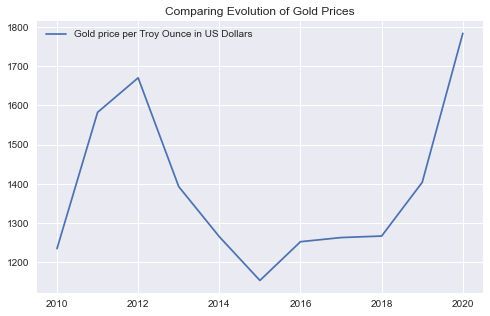

In [62]:
plt.figure(figsize=(8,5))
plt.plot(qw.index,qw['Price_gold'],label='Gold price per Troy Ounce in US Dollars')

plt.title("Comparing Evolution of Gold Prices")
plt.legend()
plt.style.use('seaborn')


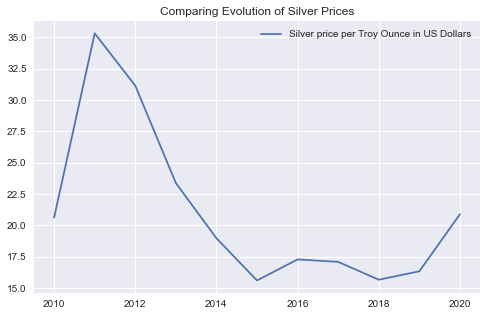

In [63]:
plt.figure(figsize=(8,5))

plt.plot(qw.index,qw['Price_silver'],label='Silver price per Troy Ounce in US Dollars')

plt.title("Comparing Evolution of Silver Prices")
plt.legend()
plt.style.use('seaborn')


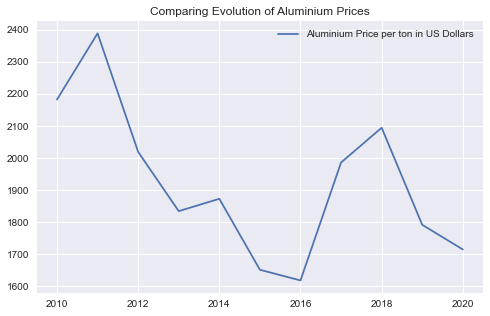

In [64]:
plt.figure(figsize=(8,5))
##plt.plot(qw.index,qw['Price_gold'],label='Gold')
plt.plot(qw.index,qw['Price_alum'],label='Aluminium Price per ton in US Dollars')

plt.title("Comparing Evolution of Aluminium Prices")
plt.legend()
plt.style.use('seaborn')


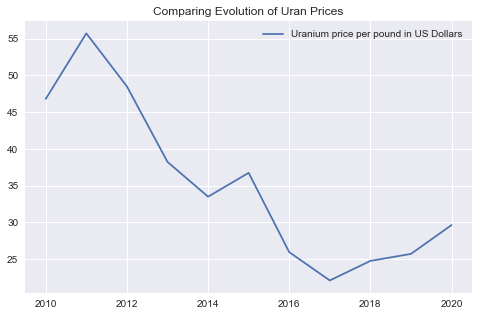

In [65]:
plt.figure(figsize=(8,5))
plt.plot(qw.index,qw['Price_uran'],label='Uranium price per pound in US Dollars')
plt.title("Comparing Evolution of Uran Prices")
plt.legend()

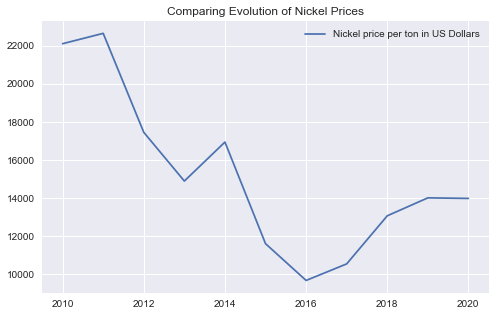

In [66]:
plt.figure(figsize=(8,5))
plt.plot(qw.index,qw['Price_nickel'],label='Nickel price per ton in US Dollars')
plt.title("Comparing Evolution of Nickel Prices")
plt.legend()